In [17]:
import cv2
import numpy
from matplotlib import pyplot as plt
from numpy import linalg as LA
from scipy.spatial import distance
import imutils

######## https://www.kaggle.com/gasgallo/faces-data #########

In [18]:
import os
from fnmatch import fnmatch

in_path = os.path.realpath("main.ipynb")                      ### Change .ipynb
root = os.path.dirname(in_path) + '/faces-data/'

pattern = "*.jpg"
# pattern_1 = "*.2.jpg"
# pattern_2 = "*.3.jpg"

images_path = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_path.append(os.path.join(path, name))
            print os.path.join(path, name)
            #print os.path.join(path, name)
#         elif fnmatch(name, pattern_1):
#             images_path.append(os.path.join(path, name))
#         elif fnmatch(name, pattern_2):
#             images_path.append(os.path.join(path, name))

/Users/namanjain/Desktop/Face Recog/faces-data/9326871.1.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.10.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.11.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.12.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.13.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.14.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.15.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.16.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.17.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.18.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.19.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.2.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.20.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.3.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.4.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/9326871.5.jpg
/Users/namanj

/Users/namanjain/Desktop/Face Recog/faces-data/jrtobi.5.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/jrtobi.6.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/jrtobi.7.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/jrtobi.8.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/jrtobi.9.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.1.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.10.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.11.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.12.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.13.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.14.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.15.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.16.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.17.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.18.jpg
/Users/namanjain/Desktop/Face Recog/faces-data/kaatki.19.jpg
/Users/namanjain/Desktop/Face 

In [19]:
M = len(images_path)
M

3041

In [27]:
images = [] 
sum_img = numpy.array([0 for i in range(36000)])

for img_path in images_path:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)#Grayscale input
    img = img.flatten() #Flatten to M*N*1 vector
    sum_img += img
    images.append(img)

In [28]:
mean_vec = sum_img/float(M)

In [29]:
nor_images = []
for img in images:
    img = img - mean_vec
    nor_images.append(img)

In [30]:
nor_images

[array([  7.50279513,   4.28904965,   1.05228543, ..., -17.58401841,
         -0.38572838,   5.42814864]),
 array([  1.50279513,   2.28904965,   2.05228543, ..., -26.58401841,
        -11.38572838,  -0.57185136]),
 array([ -3.49720487,  -1.71095035,   1.05228543, ..., -38.58401841,
        -32.38572838, -19.57185136]),
 array([  4.50279513,   6.28904965,   7.05228543, ..., -37.58401841,
        -28.38572838, -12.57185136]),
 array([  3.50279513,   4.28904965,   4.05228543, ..., -41.58401841,
        -34.38572838, -21.57185136]),
 array([  7.50279513,   6.28904965,   6.05228543, ..., -44.58401841,
        -28.38572838, -11.57185136]),
 array([  2.50279513,   3.28904965,   3.05228543, ..., -32.58401841,
        -37.38572838, -32.57185136]),
 array([  2.50279513,   3.28904965,   3.05228543, ..., -49.58401841,
        -44.38572838, -29.57185136]),
 array([ -0.49720487,  -0.71095035,   0.05228543, ..., -36.58401841,
        -20.38572838,  -7.57185136]),
 array([  2.50279513,   0.28904965,  

In [31]:
A = numpy.transpose(numpy.matrix(nor_images)) #### N2*M

In [32]:
mat_pseudo = numpy.matmul(A.transpose(),A) #### M*M

In [33]:
eig_val, v = LA.eig(mat_pseudo)

In [11]:
# print eig_val[0]
# print v[:,0]
# r = numpy.matmul(mat_pseudo,v[:,0]) # 1 * M
# t = eig_val[0]*v[:,0]
#tmp = numpy.matmul(A,v).T

In [12]:
#V = tmp[::-1]

In [34]:
k = 100#-----  #1300 - 1386.00 #1500 -1343 #1600 - 1326
eig_vec = []
c = 0

for m in range(M):
    if c < k:
        u = numpy.matmul(A,v[:,m].real)
        x = numpy.linalg.norm(u)
        u_ = u/x
        
        eig_vec.append(list(u_))
        c += 1
        print c
    else:
        break
 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [264]:
# u - N2 * 1
# A - N2 * M
# v[:,m] - M * 1
# phi - N2 * 1


matrix([[-0.0004125 ],
        [-0.00035744],
        [-0.00032995],
        ...,
        [ 0.00075508],
        [ 0.00244497],
        [ 0.00365316]])

In [260]:
eig_vec_n = numpy.matrix(eig_vec)

ValueError: matrix must be 2-dimensional

In [251]:
input_img = cv2.imread('/Users/namanjain/Desktop/bill.jpg', cv2.IMREAD_GRAYSCALE)  #Grayscale input
size = input_img.shape
#input_img = input_img[12:192,30:165]

for x in range(size[0]):
    for y in range(size[1]):
        try:
            #input_img = cv2.resize(input_img, (180,200))
            t = input_img[x:x+180,y:y+200]
            print x,y 

            input_img = t.flatten()
            mean_input = input_img - mean_vec

            sum_input = numpy.array([0.0 for i in range(36000)])

            for u in eig_vec:
                w = numpy.matmul(u.transpose(),mean_input)
                #sum_input += numpy.array(w[0,0]*u)[:,0]

            #x = numpy.linalg.norm(sum_input)
            sum_input = sum_input#/x

            ed = distance.euclidean(mean_input, sum_input)
            print ed
        except:
            continue

0 0
16232.3556493


In [245]:
#dist_list = []
#for img in nor_images:
#    dist_list.append(distance.euclidean(img, sum_input))

350

In [137]:
#min_dist = min(dist_list)

In [79]:
#min_dist

8422.215721491999

In [83]:
img_size = img.shape 

In [307]:
o = eig_vec
#o.real

In [2]:
u = numpy.matmul(A,v[:,1500].real)
x = numpy.linalg.norm(u)
u_ = u/x

w = numpy.matrix(u_.reshape((200,180)))

plt.imshow(w)
plt.show

NameError: name 'numpy' is not defined

<function matplotlib.pyplot.show>

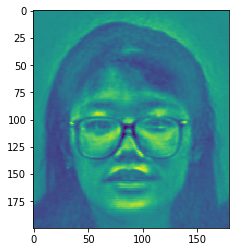

In [152]:
f = numpy.matrix(sum_input.reshape((200,180)))
plt.imshow(f)
plt.show

In [16]:
numpy.save('real-time/vectors/mean_vec',[1,2,3,4])

In [14]:
numpy.load('mean_vec.npy')

array([1, 2, 3, 4])

In [44]:
os.path.basename('/Users/namanjain/Desktop/Face Recog/real-time/Faces/Naman')

'Naman'

AttributeError: 'module' object has no attribute 'dirname'